<h2>Generative model for the Olympic 100m</h2>
<p>We will now look at generating data that looks a bit like the Olympic 100m data. We'll start by getting the data.</p>

In [9]:
import urllib
# urllib.urlretrieve('https://github.com/sdrogers/fcml/raw/master/notebooks/data/olympic100m.txt', 'olympic100m.txt')
import numpy as np
data = np.loadtxt('olympic100m.txt',delimiter=',')
x = data[:,0][:,None]
t = data[:,1][:,None]

<p>We'll assume that we know the true parameter values and look at generating the noise. We'll get the true parameter values by minimising the loss...</p>

In [10]:
import numpy as np
X = np.hstack((np.ones_like(x),x))
w = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,t))
print w

[[  3.64164559e+01]
 [ -1.33308857e-02]]


<p>Choose values for the mean and variance of the noise</p>

In [11]:
mu = 0.0
sigma_sq = 0.05

<p>Generate the noisy t values (note that `numpy.random.normal` requires the standard deviation, not the variance)</p>

In [14]:
noisy_t = np.dot(X,w) + np.random.normal(mu,np.sqrt(sigma_sq),(t.size,1))

<p>Plot the noisy data</p>

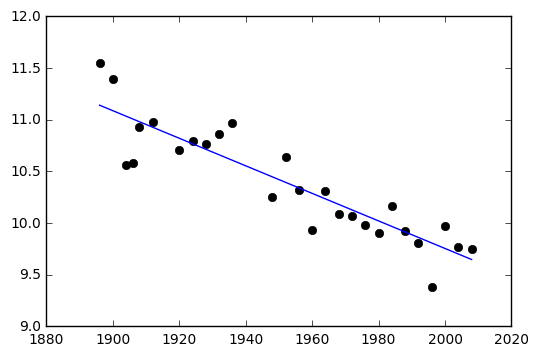

In [15]:
import pylab as plt
%matplotlib inline
plt.plot(x,noisy_t,'ko')
plt.plot(x,np.dot(X,w),'b')

<p>A second plot, this time with the real data included</p>

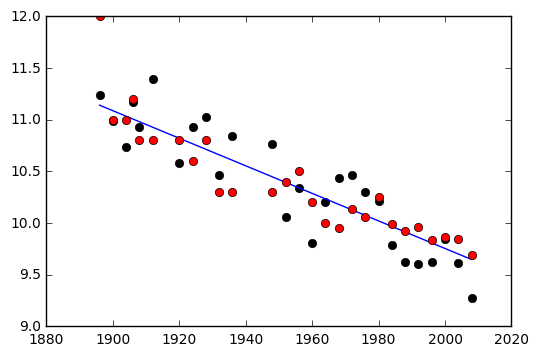

In [8]:
import pylab as plt
%matplotlib inline
plt.plot(x,noisy_t,'ko')
plt.plot(x,np.dot(X,w),'b')
plt.plot(x,t,'ro')